In [ ]:
from IPython.core.display import HTMLdef set_width(width):
    display(HTML(f"""<style>  
            .container {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} 
            .jp-Cell {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} </style>"""))
# Set container width to X% of the fullscreen 
set_width(50)

# 13A: bias and offset

> <font color='blue'>Learning goal:</font> understand how real opamps are biased, how to calculate and experimentally measure that bias and offset. Understand how it might influence your circuit.
Experiments of this week:
- Experiment 13A: observe the imperfections of a real life op-amp like bias and offset.
- Experiment 13B: observe the properties of an op-amp like GB product and slew rate.
- Experiment 13C: observe the behaviour of integrator and differentiator circuits.

Structure of an experiment:
- Predict + Stimulate (35): This is homework and should be finished **before** you start your 4 hours practicum session (done individually)
- Build + Measure (45): with your partner (group of 2)
- Evaluate (10): with a group of 4 (per table)

## BACKGROUND
> <font color='grey'>⏳ Estimated time: 10 min</font>

The op-amp in theory is quite an ideal device. In practice the op-amp has some flaws, luckily these are not so dominant that the op-amp is not usable, but from time to time you need to consider these non-ideal characteristics.
In this experiment we will have a look at the current flowing into the op-amps inputs (bias current) and the offset-voltage, a small voltage difference at the op-amps inputs.
In order to be able to analyze these currents and voltages we need a model for the real-life op-amp. A model including the non-ideal characteristics mentioned above is shown the image below. It consists of an ideal op-amp and some current and voltage sources:

<center><img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/ELC/ELC10-1.jpg" width=500px></img></center>

In this model we can see two current sources, these resemble the current flowing into the op-amps inputs, these are called the bias-currents. We see a voltage source, called the offset-voltage. 
The red-colored op-amp in the diagram is an ideal op-amp.
With some simple measurements we can estimate the value of the bias-currents and the offset-voltage. The measurements involve a multimeter, op-amp and a resistor.

With one input (non-inverting) input connected to ground we can neglect the bias-current needed for the non-inverting input. The only two sources having an influence then are the offset-voltage, $V_\mathrm{offset}$ and the bias-current of the inverting input.
The feedback network will be connected to the inverting input, and will look like the circuit shown below:

<center><img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/ELC/13A_bias_offset.png" width=500px></img></center>

The only resistor in the circuit is $R_\mathrm{f}$. Regard this circuit as a non-inverting ampilifier, noting that $R_\mathrm{i}$ is not there (i.e. infinite resistance). Think about the following questions:
- What will happen to the gain when $R_\mathrm{i}$ is infinite?
- What will be the influence of $R_\mathrm{f}$?
- Does this intuition hold up when you check this with the gain formula for a non-inverting amplifier?

Now remember that the output will regulate the inputs through the feedback network (here it is only $R_\mathrm{f}$). For such a non-ideal op-amp, the feedback applied will be perturbed by the bias-current abd the offset voltage.

When designing a circuit and you need to select an op-amp, always have a look at the datasheet. In the datasheet of a specific type of op-amp you will find information on the bias-current, offset voltage and many other parameters.

An important question to ask is when do need to take the bias-current into account? This depends on the application. Take measuring a pH for example For measuring pH a lot of different sensors are available. When you want to build your own read-out circuit, you should carefully look at the characteristics of the pH-probe. Such a probe very often generates a small pH-sensitive voltage. This voltage should be amplified, e.g. by an op-amp circuit, before it can be sampled by an ADC. Typical pH sensors have a high-impedance. Imagine the sensor as a Thevenin equivalent with a simple resistor. Because the amplifier draws a bias current, a current will flow over that resistor. Due to the large impedeance of the sensor, a large voltage drop occurs, and thus you get a large error in the voltage measurement. In this example, care should be taken to select an op-amp with very small bias-current in order to minimize this voltage drop.

<!-- Inside the probe is a tiny electrode, in order to make the probe fast responding. This tiny electrode will behave like a high-impedance (think of it like a Thevenin equivalent with a low voltage and a high Thevenin resistance). -->



## ANTICIPATE: imperfections of an op-amp
> <font color='grey'>⏳ Estimated time: 10 min</font>

The offset voltage and bias-current can be measured with a simple circuit. For this exercise, we will consider the following circuit:

<center><img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/ELC/ELC10-2.jpg" width=500px></img></center>

The bias-current at the input of the op-amp has to flow from the output of the op-amp. In doing so, it will flow through the resistor.



* Predict the value of $R_\mathrm{a}$, to be used to measure $V_\mathrm{offset}$ without being influenced by the $I_\mathrm{bias}$ of the op-amp. <br>
* Predict the value of $R_\mathrm{a}$, to be used to measure $I_\mathrm{bias}$ with minimal influence of $V_\mathrm{offset}$ of the op-amp.



<details>
<summary><font size=4>ℹ️</font> <b>Hints</b></summary>
    
* What would be the gain of this circuit? <br>
* If you only want to measure the offset voltage, you need to make sure that $I_\mathrm{bias}$ cannot result in any voltage error. What value for $R_\mathrm{a}$ do you choose?
* In a voltage measurement, you will always measure the offset voltage. How do you make sure that this is negligible compared to the voltage error caused by $I_\mathrm{bias}$?

</details>

In [ ]:
### TO DO="your predicted values for Ra, to measure Voffset and Ibias"


## SIMULATE: 
> <font color='grey'>⏳ Estimated time: 15 min</font>

Recreate the circuit above in LTSpice. 

Use the type LM741 opamp and supply it with 12 V on \"+\" supply rail and -12 V on \"-\" rail, which is the same opamp as on the testboards in the SCR. Please note that the LM741 performs much less ideally then the opamps we are using on the ALPACA (TL072 and LM358, for more info: https://components101.com/article/difference-between-lm358-and-lm741)

LM741 op-amap is not avaliable by default in LTSpice. You will need to download a file from Brightspace (from LTSpice resources) named `LM741.rar`. Extract 2 files inside it. Put the two files (not the folder) in the same location as your schematic. This is probably `Documents\LTspice`

<!--
<center><img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/LTS/LTSpice_add_component_1.png" width="500px"/></center>

<center><img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/LTS/LTSpice_add_component_2+3+4+5.png" width="500px"/></center>

<center><img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/LTS/LTSpice_add_component_7.png" width="500px"/></center>

<center><img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/LTS/LTSpice_add_component_8.png" width="500px"/></center>

<center><img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/LTS/LTSpice_add_component_9.png" width="500px"/></center>


-->
### Questions

* What offset voltage and bias current do observe? (Pick the right simulation settings yourself!)
* Test your ANTICIPATE predictions <br>
> Take the maximum resistance as $1 \;\mathrm{M} \Omega$ (so if you need infinite, put $1 \;\mathrm{M} \Omega$).

<center><img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/LTS/13A_LM741_bias.JPG" width="500px"/></center>

<!--
> <font size=4>ℹ️</font> <b>Hints</b>
> * You might need to add additional labels to see the result better.
> * You can supply the rails using labels. First create two voltage sources and connect them. In the middle(between the sources)add a ground connection and add short wires to the free "+" and "-" ends. Then attach labels to them and attach those labels to rails on opamp.
> * If you correctly place both files inside the same folder and get a pop-up saying `lm741.lib not found` while trying to use LM741, you can autogenerate a path to fix this problem. Go into *`Tools` > `Control Panel` > `Sym & Lib Search Paths` > `library search path`* and write `lm741.lib`'s file directory there.
> 
> <img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/LTS/LTSpice_add_component_10.png" width="400px"/>
>
> <img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/LTS/LTSpice_add_component_11.png" width="400px"/>-->


In [ ]:
### TO DO="your observations for Voffset and Ibias"


* Precap (to be updated?): https://www.youtube.com/watch?v=o6wAT3JkHEc


## IMPLEMENT & INVESTIGATE 1: Measure the bias and offset experimentally
> <font color='grey'>⏳ Estimated time: 30 min</font>

You will need:
* Testboard 4
* Digital multimeter
* Cables

For these experiments an op-amp of the type LM741 is used. It is marked with U201 on the board in the Studio Classroom.

<details>
<summary><font size=4>ℹ️</font> <b>Hints</b></summary>

<center><img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/ELC/ELC10-3.jpg" width=300px></img></center>

> - U25 is **NOT** the output <br>
> - The inputs and output are marked in <font color='red'> **RED** </font> 
> - Search for testboard 4 schematic on Brightspace to see which resistor you need to use.
> - Make sure that the **switch under the opamp** is in **up(on)** position, while **2 switches situated under the power supply** conections are in the **down(-/+12V)** position.
</details>

- Measure $U_\mathrm{o}$(Vout) with the correctly chosen $R_\mathrm{a}$ and determine *$V_\mathrm{offset}$*.

In [ ]:
### TO DO="your value for RA + determined Voffset"




- Measure *Uo* with the appropriate *Ra* and determine *Ibias*.

> <font size=4>ℹ️</font> <b>Hints</b>
> * The measurements are done at the output of the op-amp.
> * Note that the voltages will be in the mV range.

In [1]:
### TO DO="your value for RA + determined Ibias"


## IMPLEMENT & INVESTIGATE 2: Validate your measurements
> <font color='grey'>⏳ Estimated time: 15 min</font>


* Find the expected values for Voffset and Ibias in the data sheet values of the LM741 by clicking this [**LINK**](https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/blob/main/ELC/ELC10%20Appendix+OPAMPS.pdf). Look for the *LM741 Datasheet*. Note down these values

* Compare these values with your experimental values and simulation. Are they in agreement? If not, think why and redo I&I 1 so the values match (they should be in the same/smaller magnitude, not exacly the same value but close). If you cannot get why you got it wrong, as your TA.

* What can you say about a difference between real life measurement and a simulation?

In [ ]:
### TO DO="your comparison between real life and simulation"


## COMPARE & CONCLUDE
> <font color='grey'>⏳ Estimated time: 10 min</font>


* Wait till all (4) group members finish their observation
* Compare your results with your other group members. 
* If your results agree, and are in line with all predictions, then talk to a TA and get checked off
* Otherwise, so if your results do not agree, or your results are not in line with your predictions, then first discuss amongst your group before getting a TA. 

**To be checked off by a TA**
1. Explain what values of $R_\mathrm{a}$ did you pick for $V_\mathrm{offset}$ and $I_\mathrm{bias}$?
2. exit card: 1. Write a brief abstract on what you learned (conclusion, useful graph), 2. Which troubleshooting skills do you want to remember for next sessions, 3. Which code do you copy for use in next sessions,
3. How do think this notebook could be improved

In [ ]:
#13A bias-offset
### TO DO='1 explain which values you picked for Ra'

### TO DO="2a. abstract"

### TO DO="2b. troubleshooting"

### TO DO="2c. code"

### TO DO="3. what changes would you suggest?"


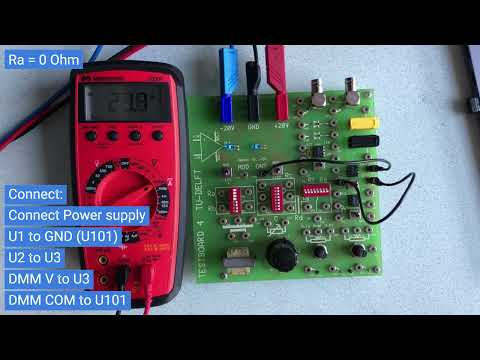

In [2]:
# recording
from IPython.lib.display import YouTubeVideo
YouTubeVideo('8ozZaZrRE38', width = 600, height = 450)